In [1]:
import pandas as pd
import os

### Task 1: Merging 12 months data in single file

In [ ]:
df= pd.read_csv(r'C:\Users\dell\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv')

In [ ]:
df.head()

In [6]:
files=[file for file in os.listdir(r'C:\Users\dell\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

all_months_data=pd.DataFrame()

for file in files:
    df= pd.read_csv(r'C:/Users/dell/Downloads/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data,df])
        
all_months_data.to_csv('all_data.csv',index=False)    


### Read in updated dataframe

In [12]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


### Clean Up the Data

- Drop NaN Values
- Find 'O' and delete it

In [21]:
all_data=all_data.dropna(how='all')

In [23]:
all_data=all_data[all_data['Order Date'].str[0:1]!='O']

### Task 2:Add month column

In [24]:
all_data['Month']=all_data['Order Date'].str[0:1]
all_data['Month']=all_data['Month'].astype('int32')

C:\Users\dell\AppData\Local\Temp/ipykernel_7356/161312691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Order Date'].str[0:1]
C:\Users\dell\AppData\Local\Temp/ipykernel_7356/161312691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Month'].astype('int32')


In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


### convert columns to correct type

In [36]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


### add sales column

In [37]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add a city column:

In [74]:
def get_city(adress):
    return adress.split(',')[2]


all_data['City_Name']=all_data['Purchase Address'].apply(lambda x:x.split(',')[1]+' '+ x.split(',')[2].split(' ')[1])

In [75]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_Name
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### - Question 1: What was the best month for sales? How much was earned that month?

In [44]:
results=all_data.groupby('Month').sum()

In [58]:
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,81518,13296339.30,13372030.15
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


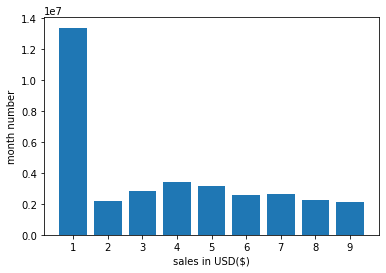

In [63]:
import matplotlib.pyplot as plt

months=range(1,10)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('sales in USD($)')
plt.ylabel('month number')
plt.show()


- 1st month was the best month for sales

### Question 2: Which city had the highest no. of sales

In [78]:
results=all_data.groupby('City_Name').sum()

In [79]:
results

,Quantity Ordered,Price Each,Month,Sales
City_Name,,,,
Atlanta GA,16602,2779908.20,54357,2795498.58
Austin TX,11153,1809873.61,36483,1819581.75
Boston MA,22528,3637409.77,72702,3661642.01
Dallas TX,16730,2752627.82,54112,2767975.40
Los Angeles CA,33289,5421435.23,108312,5452570.80
New York City NY,27932,4635370.83,90946,4664317.43
Portland ME,2750,447189.25,9120,449758.27
Portland OR,11303,1860558.22,36412,1870732.34
San Francisco CA,50239,8211461.74,163222,8262203.91


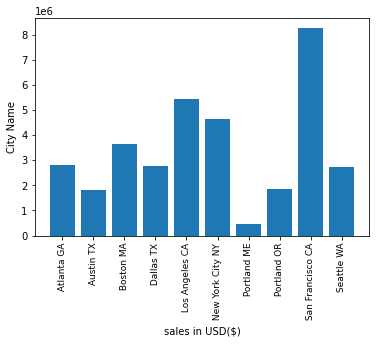

In [85]:
cities=[city for city, df in all_data.groupby('City_Name')]

plt.bar(cities, results['Sales'])
plt.xticks(cities,rotation='vertical',size=9)
plt.xlabel('sales in USD($)')
plt.ylabel('City Name')
plt.show()

- San Francisco City has the highest sales

### Question 3:What time should we display advertisements to maximize likelihood of customer's buying product?

In [86]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [90]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_Name,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


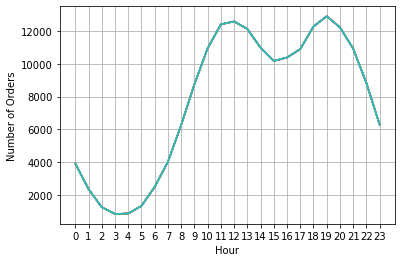

In [119]:
hours=[hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders')


plt.show()


- At 11 Am and 7 Pm is the correct time

### Question 4: What Products are most often sold together

In [143]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: (',').join(x))

df=df[['Order ID', "Grouped"]].drop_duplicates()

df.head(100)

C:\Users\dell\AppData\Local\Temp/ipykernel_7356/238917851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: (',').join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2661,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2682,179128,"iPhone,Apple Airpods Headphones"
2717,179162,"Google Phone,USB-C Charging Cable"
2782,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [145]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    

    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most?Why do you think it is sold most?


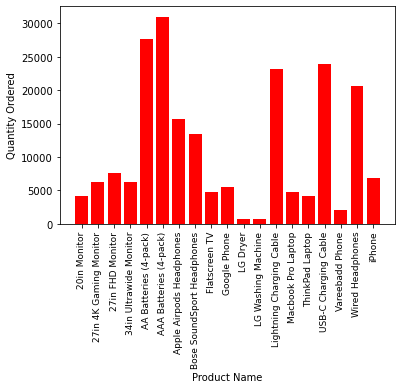

In [171]:
prodcut_group=all_data.groupby('Product')
quantity_ordered=prodcut_group.sum()['Quantity Ordered']

products=[product for product,df in prodcut_group]

plt.bar(products,quantity_ordered,color='r')
plt.xticks(products,rotation='vertical',size=9)
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\dell\AppData\Local\Temp/ipykernel_7356/1373174466.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=9)


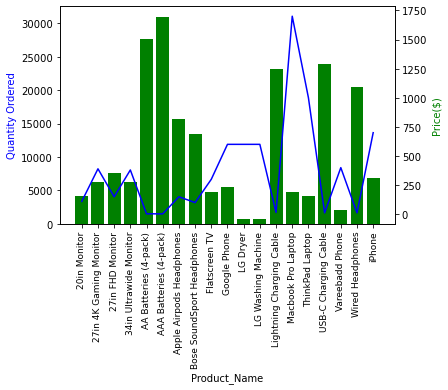

In [174]:
prices=all_data.groupby('Product').mean()['Price Each']


fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product_Name',)
ax1.set_ylabel('Quantity Ordered',color='b')
ax2.set_ylabel('Price($)',color='g')
ax1.set_xticklabels(products,rotation='vertical',size=9)

plt.show()

- Sales of AAA batteries is high 
- This is high because of its low prices